In [12]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import newsgroups_class as nc
import classification as lg
from scipy.sparse import csr_matrix

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [3]:
############# Load Data #################
x_train, y_train, x_test, y_test = nc.load_data()
tasks = nc.create_mtl_datasets(x_test,y_test, nTasks=200, taskSize= 30, testSize=40)
xs,ys,dy,ss,test_xs,test_ys,test_dy,test_ts = nc.generate_data(tasks) 

data loaded!
finish generate data!


In [50]:
#k=20
## NB- L1 
model_error_L1 = []
model_L1 =nc.UserDefineModel(xs,ys,dy,ss,penalty='l1')
model_L1.train_all_fs()
model_L1.train_ws()
nb_err = nc.seg_model_error_01(model_L1,test_xs,test_ys,test_ts)
print 'Initial error of L1 model is ', nb_err

## NB-L2
model_error_L2 = []
model_L2 =nc.UserDefineModel(xs,ys,dy,ss,penalty='l2')
model_L2.train_all_fs()
model_L2.train_ws()
nb_err = nc.seg_model_error_01(model_L2,test_xs,test_ys,test_ts)
print 'Initial error of L2 model is ', nb_err

TOTALS: fit time: 1.893291
Training accuracy of fs is  0.941333333333
ws: feature_time (s): 0.000273, train_time (s): 2.264262
Initial error of L1 model is  0.587833333333
TOTALS: fit time: 1.829706
Training accuracy of fs is  0.941333333333
ws: feature_time (s): 0.000324, train_time (s): 2.635340
Initial error of L2 model is  0.1015


In [51]:
task = nc.create_mtl_datasets(x_train,y_train,nTasks=200,taskSize=30,testSize=40)
test_xs,test_ys,test_ts = nc.generate_additional_data(task,model_L1, model_L2,0)

making task 0
making task 50
making task 100
making task 150


# Cold Start

In [52]:
iters = range(2,30)
for i in iters:
    print 'cold-start: # of points trained: ', i
    model_L1.train_ws(i)
    svm_err = nc.seg_model_error_01(model_L1,test_xs,test_ys,test_ts)
    model_error_L1.append(svm_err)
    print 'Testing Error of nb model --l1 is ', svm_err

    model_L2.train_ws(i)
    svm_err = nc.seg_model_error_01(model_L2,test_xs,test_ys,test_ts)
    model_error_L2.append(svm_err)
    print 'Testing Error of nb model-- L2 is ', svm_err

cold-start: # of points trained:  2
ws: feature_time (s): 0.000530, train_time (s): 2.291741
Testing Error of nb model --l1 is  0.4
ws: feature_time (s): 0.000582, train_time (s): 2.326393
Testing Error of nb model-- L2 is  0.326833333333
cold-start: # of points trained:  3
ws: feature_time (s): 0.000546, train_time (s): 2.335667
Testing Error of nb model --l1 is  0.4
ws: feature_time (s): 0.000595, train_time (s): 2.439420
Testing Error of nb model-- L2 is  0.438166666667
cold-start: # of points trained:  4
ws: feature_time (s): 0.000576, train_time (s): 2.499748
Testing Error of nb model --l1 is  0.403
ws: feature_time (s): 0.000536, train_time (s): 2.490565
Testing Error of nb model-- L2 is  0.384666666667
cold-start: # of points trained:  5
ws: feature_time (s): 0.000632, train_time (s): 2.603121
Testing Error of nb model --l1 is  0.404
ws: feature_time (s): 0.000570, train_time (s): 2.574460
Testing Error of nb model-- L2 is  0.391666666667
cold-start: # of points trained:  6
ws: 

In [55]:
f = open('cold-start-newsgroup-l2.txt','w')

f.write('NB Model--L2 Norm:\n# of points:')
for i in iters:
    f.write('\t'+str(i))
f.write('\n')  

for t in model_error_L2:
    f.write('\t'+str(t))
f.write('\n')

f.write('NB Model--L1 Norm:\n# of points:')
for i in iters:
    f.write('\t'+str(i))
f.write('\n')  

for t in model_error_L1:
    f.write('\t'+str(t))
f.write('\n')
f.close()


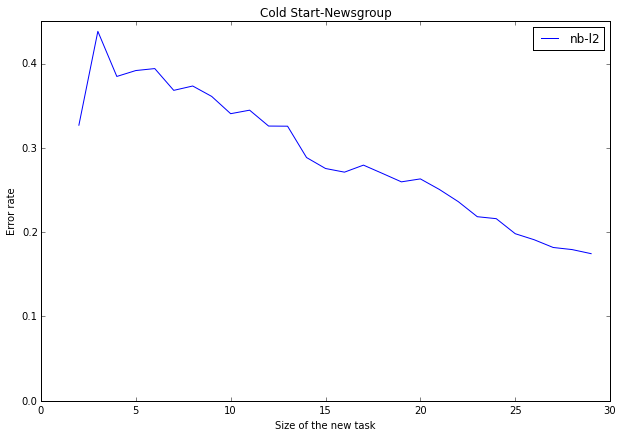

In [54]:
## plot ###
fig,ax = plt.subplots()
ax.plot(iters, model_error_L2, label = 'nb-l2')
#ax.plot(iters, model_error_L1, label = 'nb-l1')
ax.set_xlabel('Size of the new task')
ax.set_ylabel('Error rate')
ax.set_title('Cold Start-Newsgroup')
ax.legend()
default_size = fig.get_size_inches()
size_mult = 1.7
ax.set_ylim((0.0, ax.get_ylim()[1]))
fig.set_size_inches(default_size[0]*size_mult,default_size[1]*size_mult)
plt.show()


# Updating Strategies

In [5]:
tasks = nc.create_mtl_datasets(x_test,y_test, nTasks=200, taskSize= 20, testSize=40)

In [23]:
len(tasks)

10000

# Retrain New

In [6]:
xs = []
ys = []
dy = []
ss = []
nb_retrain_new_l1 = nc.UserDefineModel(xs,ys,dy,ss,strategy = 'train-all',penalty = 'l1') # using the default value 
nb_retrain_new_l2 = nc.UserDefineModel(xs,ys,dy,ss,strategy = 'train-all',penalty = 'l2') # using the default value 
test_xs,test_ys,test_ss = nc.generate_additional_data (tasks, nb_retrain_new_l1, nb_retrain_new_l2,3)
nb_retrain_new_l2.train_all_fs()
nb_retrain_new_l2.train_ws()
nb_retrain_new_l2_errors = []
nb_retrain_new_l2.strategy = 'retrain-new'
nb_err = nc.seg_model_error_01(nb_retrain_new_l2,test_xs,test_ys,test_ss)
nb_retrain_new_l2_errors.append(nb_err)
#print "Initial Error OracleMTL---Train All: %f" % oracle_err
print 'Initial Error l2: ', nb_err

TOTALS: fit time: 1.329184
Training accuracy of fs is  0.91125
ws: feature_time (s): 0.000324, train_time (s): 2.421568
Initial Error l2:  0.09975


In [6]:
test_xss,test_yss,test_tss, perm, size = nc.generate_data_concept_drift(x_train, y_train, nb_retrain_new_l2,20,'same')

In [7]:
test_xss1,test_yss1,test_tss1, perm, size1 = nc.generate_data_concept_drift(x_train, y_train, nb_retrain_new_l2,100,'same',perm)

newsgroups_class.py:218: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if perm == None:


In [8]:
test_xss2,test_yss2,test_tss2,perm, size2 = nc.generate_data_concept_drift(x_train, y_train, nb_retrain_new_l2,200,'total',perm)

In [9]:
test_xss3,test_yss3,test_tss3,perm, size3 = nc.generate_data_concept_drift(x_train, y_train, nb_retrain_new_l2,200,'total',perm)

In [40]:
segments = nb_retrain_new_l2.segments

In [20]:
lala = np.random.permutation(10)
lala[0:3]

array([3, 9, 7])

In [10]:
size3

8

In [10]:
cnt = 0
lt = 20+size+size1+size2+size3
for i in range(20,lt):
    print '# of points is', i
    nb_retrain_new_l2.train_ws(i,perm)    
    if i<20+size:
        nb_err = nc.seg_model_error_01(nb_retrain_new_l2,test_xss,test_yss,test_tss)
    elif i<20+size+size1:
        nb_err = nc.seg_model_error_01(nb_retrain_new_l2,test_xss1,test_yss1,test_tss1)
    elif i<20+size+size1+size2:
        nb_err = nc.seg_model_error_01(nb_retrain_new_l2,test_xss2,test_yss2,test_tss2)
    elif i<20+size+size1+size2+size3:
        nb_err = nc.seg_model_error_01(nb_retrain_new_l2,test_xss3,test_yss3,test_tss3)    
    print nb_err
    nb_retrain_new_l2_errors.append(nb_err)
    
    if nb_err > 0.4 and (nb_err-nb_retrain_new_l2_errors[cnt])>0.2:
        nb_retrain_new_l2.points = i
        print 'current self.points is ', nb_retrain_new_l2.points
    cnt += 1 
    

# of points is 20
ws: feature_time (s): 0.000312, train_time (s): 3.323040
0.516125
current self.points is  20
# of points is 21
ws: feature_time (s): 0.000293, train_time (s): 3.327535
0.4375
# of points is 22
ws: feature_time (s): 0.000389, train_time (s): 3.728444
0.386875
# of points is 23
ws: feature_time (s): 0.000326, train_time (s): 3.300694
0.329125
# of points is 24
ws: feature_time (s): 0.000315, train_time (s): 3.301871
0.281625
# of points is 25
ws: feature_time (s): 0.000356, train_time (s): 3.639708
0.25175
# of points is 26
ws: feature_time (s): 0.000301, train_time (s): 3.273402
0.221875
# of points is 27
ws: feature_time (s): 0.000305, train_time (s): 3.374274
0.2015
# of points is 28
ws: feature_time (s): 0.000319, train_time (s): 3.312719
0.194625
# of points is 29
ws: feature_time (s): 0.000282, train_time (s): 3.214117
0.186125
# of points is 30
ws: feature_time (s): 0.000365, train_time (s): 3.669690
0.18075
# of points is 31
ws: feature_time (s): 0.000304, train

newsgroups_class.py:428: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if perm == None:


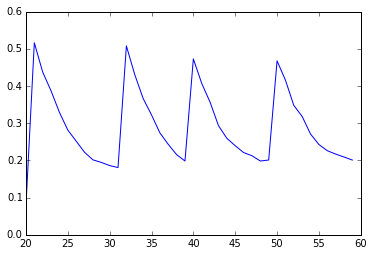

In [13]:
iters = range(20,lt+1)
plt.plot(iters,nb_retrain_new_l2_errors)
plt.show()

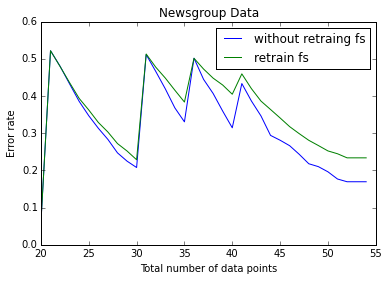

"\nff = open('comparison_retraining_fs_newsgroup-200tasks.txt','w')\nff.write('without retraining fs:\n')\nff.write('# of iters:')\nfor i in iters:\n    ff.write('\t'+str(i))\nff.write('\n')\nfor i in range(len(no_retrain)):\n    ff.write('\t'+str(no_retrain[i]))\nff.write('\n')\n\nff.write('retraining fs:\n')\nff.write('# of iters:')\nfor i in iters:\n    ff.write('\t'+str(i))\nff.write('\n')\nfor i in range(len(retrain)):\n    ff.write('\t'+str(retrain[i]))\nff.write('\n')\nff.close()\n"

In [19]:
no_retrain = nb_retrain_new_l2_errors
retrain = nb_train_all_l2_errors
fig,ax = plt.subplots()
ax.plot(iters, no_retrain, label='without retraing fs')
ax.plot(iters, retrain, label='retrain fs')
ax.legend()
ax.set_xlabel('Total number of data points')
ax.set_ylabel('Error rate')
ax.set_title('Newsgroup Data')
plt.show()

"""
ff = open('comparison_retraining_fs_newsgroup-200tasks.txt','w')
ff.write('without retraining fs:\n')
ff.write('# of iters:')
for i in iters:
    ff.write('\t'+str(i))
ff.write('\n')
for i in range(len(no_retrain)):
    ff.write('\t'+str(no_retrain[i]))
ff.write('\n')

ff.write('retraining fs:\n')
ff.write('# of iters:')
for i in iters:
    ff.write('\t'+str(i))
ff.write('\n')
for i in range(len(retrain)):
    ff.write('\t'+str(retrain[i]))
ff.write('\n')
ff.close()
"""

# train all

In [17]:
xs = []
ys = []
dy = []
ss = []
nb_train_all_l1 = nc.UserDefineModel(xs,ys,dy,ss,strategy = 'train-all',penalty = 'l1') # using the default value 
nb_train_all_l2 = nc.UserDefineModel(xs,ys,dy,ss,strategy = 'train-all',penalty = 'l2') # using the default value 
test_xs,test_ys,test_ss = nc.generate_additional_data (tasks, nb_train_all_l1, nb_train_all_l2,3)

nb_train_all_l2.train_all_fs()
nb_train_all_l2.train_ws()
nb_train_all_l2_errors = []
#nb_train_all_l2.strategy = 'retrain-new'
nb_err = nc.seg_model_error_01(nb_train_all_l2,test_xs,test_ys,test_ss)
nb_train_all_l2_errors.append(nb_err)
#print "Initial Error OracleMTL---Train All: %f" % oracle_err
print 'Initial Error l2: ', nb_err

TOTALS: fit time: 51.824267
Training accuracy of fs is  0.995275
ws: feature_time (s): 0.014601, train_time (s): 155.652231
Initial Error l2:  0.078045


In [18]:
nb_train_all_l2.xs += nb_retrain_new_l2.xs[200000:]
nb_train_all_l2.ys += nb_retrain_new_l2.ys[200000:]
nb_train_all_l2.ss += nb_retrain_new_l2.ss[200000:]
nb_train_all_l2.target_y += nb_retrain_new_l2.target_y[200000:]
segment = nb_train_all_l2.segments
seg = nb_retrain_new_l2.segments
for s in perm:
    segment[s].xs += seg[s].xs[20:]
    segment[s].ys += seg[s].ys[20:]
    segment[s].pref = seg[s].pref

In [19]:
for i in range(20,lt):
    print '# of points is', i
    nb_train_all_l2.train_ws(i,perm)    
    if i<20+size:
        nb_err = nc.seg_model_error_01(nb_train_all_l2,test_xss,test_yss,test_tss)
    elif i<20+size+size1:
        nb_err = nc.seg_model_error_01(nb_train_all_l2,test_xss1,test_yss1,test_tss1)
    elif i<20+size+size1+size2:
        nb_err = nc.seg_model_error_01(nb_train_all_l2,test_xss2,test_yss2,test_tss2)
    elif i<20+size+size1+size2+size3:
        nb_err = nc.seg_model_error_01(nb_train_all_l2,test_xss3,test_yss3,test_tss3)    
    print nb_err
    nb_train_all_l2_errors.append(nb_err)

# of points is 20
ws: feature_time (s): 0.000316, train_time (s): 3.270682
0.516125
# of points is 21
ws: feature_time (s): 0.000346, train_time (s): 3.703326
0.43975
# of points is 22
ws: feature_time (s): 0.000330, train_time (s): 3.944754
0.383
# of points is 23
ws: feature_time (s): 0.000371, train_time (s): 3.747432
0.32725
# of points is 24
ws: feature_time (s): 0.000397, train_time (s): 3.844710
0.284875
# of points is 25
ws: feature_time (s): 0.000293, train_time (s): 3.436981
0.254
# of points is 26
ws: feature_time (s): 0.000328, train_time (s): 3.964290
0.2235
# of points is 27
ws: feature_time (s): 0.000345, train_time (s): 3.951323
0.20225
# of points is 28
ws: feature_time (s): 0.000359, train_time (s): 4.420275
0.192125
# of points is 29
ws: feature_time (s): 0.000316, train_time (s): 3.661329
0.182
# of points is 30
ws: feature_time (s): 0.000300, train_time (s): 3.744650
0.17275
# of points is 31
ws: feature_time (s): 0.000299, train_time (s): 3.673812
0.5015
# of poin

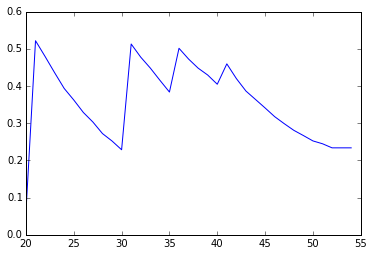

In [18]:
iters = range(20,lt+1)
plt.plot(iters,nb_train_all_l2_errors)
plt.show()